In [1]:
import numpy as tr
import pandas as dr

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [7]:
dataset = sns.load_dataset('taxis')

In [8]:
dataset

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [20]:
data = dataset.drop(['dropoff','passengers','pickup','distance','tolls','total','payment','pickup_zone','dropoff_zone','color','pickup_borough','dropoff_borough'],axis=1)

In [21]:
data

,fare,tip
0,7.0,2.15
1,5.0,0.00
2,7.5,2.36
3,27.0,6.15
4,9.0,1.10
...,...,...
6428,4.5,1.06
6429,58.0,0.00
6430,16.0,0.00
6431,6.0,0.00


In [22]:
x = data.iloc[:,-1].values.reshape(-1,1)
y = data.iloc[:,0].values.reshape(-1,1)

In [23]:
x

array([[2.15],
       [0.  ],
       [2.36],
       ...,
       [0.  ],
       [0.  ],
       [3.36]])

In [24]:
y

array([[ 7. ],
       [ 5. ],
       [ 7.5],
       ...,
       [16. ],
       [ 6. ],
       [15. ]])

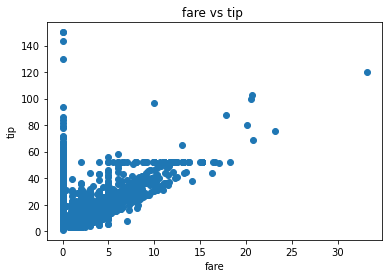

In [42]:
plt.scatter(x,y)
plt.title('fare vs tip ')
plt.xlabel('fare')
plt.ylabel('tip')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_train.shape

(5146, 1)

In [46]:
x_test.shape

(1287, 1)

In [47]:
y_train.shape

(5146, 1)

In [48]:
y_test.shape

(1287, 1)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm=LinearRegression()

In [51]:
lm.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = lm.predict(x_test)

In [53]:
y_pred

array([[38.30638352],
       [17.34501655],
       [ 8.62997737],
       ...,
       [11.61799081],
       [ 8.62997737],
       [ 8.62997737]])

In [54]:
check=dr.DataFrame(x_test,columns=['taxis'])

In [55]:
check['Actual fare'] = y_test

In [56]:
check['predicted tip'] = y_pred

In [57]:
check

,taxis,Actual fare,predicted tip
0,13.11,52.0,38.306384
1,3.85,16.0,17.345017
2,0.00,6.0,8.629977
3,2.08,5.0,13.338362
4,4.16,17.0,18.046747
...,...,...,...
1282,1.24,7.0,11.436899
1283,0.00,5.5,8.629977
1284,1.32,5.5,11.617991
1285,0.00,5.0,8.629977


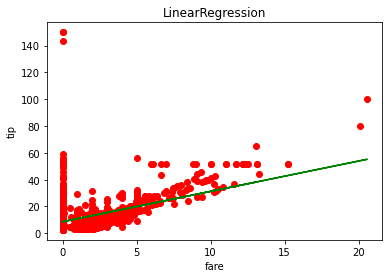

In [58]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='green')
plt.title('LinearRegression')
plt.xlabel('fare')
plt.ylabel('tip')
plt.show()


In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [63]:
mean_squared_error(y_test,y_pred)

119.99570199117622

In [65]:
mean_absolute_error(y_test,y_pred)

6.285646328947403

In [66]:
r2_score(y_test,y_pred)

0.2356676228688801